#### Exercise
Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.

Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)

Plot bar charts showing impact of employee salaries on retention

Plot bar charts showing corelation between department and employee retention

Now build logistic regression model using variables that were narrowed down in step 1
Measure the accuracy of the model

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [20]:
data = pd.read_csv('HR data.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [21]:
data.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [23]:
data['left'] = data['left'].astype(object)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  object 
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 1.1+ MB


<AxesSubplot:xlabel='left', ylabel='count'>

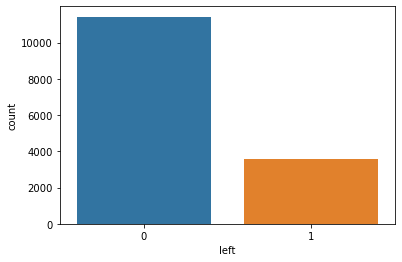

In [25]:
sns.countplot(x = data['left'])

[Text(0.5, 1.0, 'Bar chart showing impact of employee salaries on retention ')]

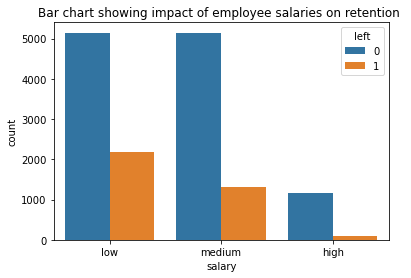

In [26]:
sns.countplot(data = data, x ='salary', hue = 'left' ).set(title = "Bar chart showing impact of employee salaries on retention ")


<AxesSubplot:xlabel='salary'>

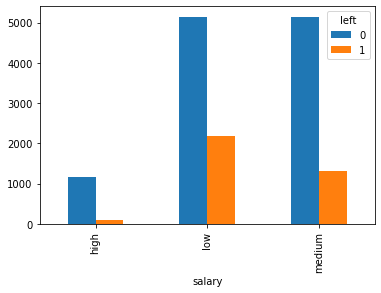

In [65]:
pd.crosstab(data.salary,data.left).plot(kind='bar')

[Text(0.5, 1.0, 'Bar chart showing impact of Department on retention ')]

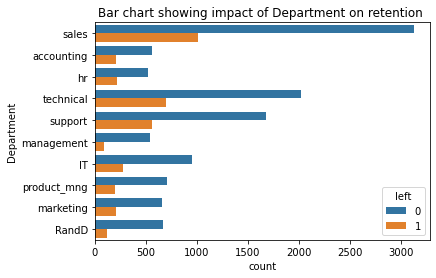

In [27]:
sns.countplot(data = data, y ='Department', hue = 'left' ).set(title = "Bar chart showing impact of Department on retention ")


<AxesSubplot:xlabel='Department'>

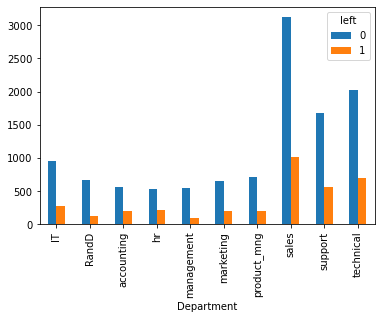

In [66]:
pd.crosstab(data.Department,data.left).plot(kind='bar')

In [36]:
dummies = pd.get_dummies(data, drop_first = True)

In [38]:
column_list = [dummies.columns] 
column_list

[Index(['satisfaction_level', 'last_evaluation', 'number_project',
        'average_montly_hours', 'time_spend_company', 'Work_accident',
        'promotion_last_5years', 'left_1', 'Department_RandD',
        'Department_accounting', 'Department_hr', 'Department_management',
        'Department_marketing', 'Department_product_mng', 'Department_sales',
        'Department_support', 'Department_technical', 'salary_low',
        'salary_medium'],
       dtype='object')]

In [44]:
X = dummies.drop(['left_1'], axis = 1)
X


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,0,0,0,0,0,0,0,1,0,1,0
14995,0.37,0.48,2,160,3,0,0,0,0,0,0,0,0,0,1,0,1,0
14996,0.37,0.53,2,143,3,0,0,0,0,0,0,0,0,0,1,0,1,0
14997,0.11,0.96,6,280,4,0,0,0,0,0,0,0,0,0,1,0,1,0


In [45]:
print([X.columns])

[Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Department_RandD', 'Department_accounting',
       'Department_hr', 'Department_management', 'Department_marketing',
       'Department_product_mng', 'Department_sales', 'Department_support',
       'Department_technical', 'salary_low', 'salary_medium'],
      dtype='object')]


In [46]:
Y = dummies['left_1']
Y  

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left_1, Length: 14999, dtype: uint8

In [54]:
train_x, test_x,train_y, test_y = train_test_split(X,Y, test_size=0.2, random_state = 0)

In [56]:
model = LogisticRegression()
model.fit(train_x, train_y)

C:\Users\Manoj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [58]:
model.score(train_x,train_y)

0.8007333944495375

In [59]:
predictions = model.predict(test_x)

In [71]:
model.score(test_x, test_y)
# makes predictions for test_x (i.e. predictions) and compares them against test_y (actual values)


0.8013333333333333

In [72]:
accuracy_score(test_y, predictions)
# (true, pred)

0.8013333333333333

In [83]:
cm = confusion_matrix(test_y, predictions, normalize = 'all')
cm
## AS PER SKLEARN DOCUMENTATION, 
# ROWS = TRUTH , COLUMNS = PREDICTED

array([[0.71066667, 0.05566667],
       [0.143     , 0.09066667]])

Text(33.0, 0.5, 'Truth')

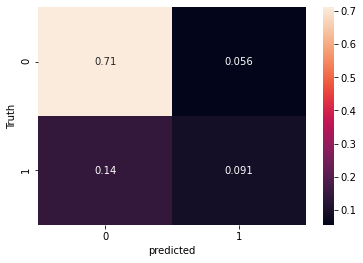

In [84]:
sns.heatmap(cm, annot = True)
plt.xlabel("predicted")
plt.ylabel('Truth')